In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
# define parameters for NN
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 5

In [ ]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

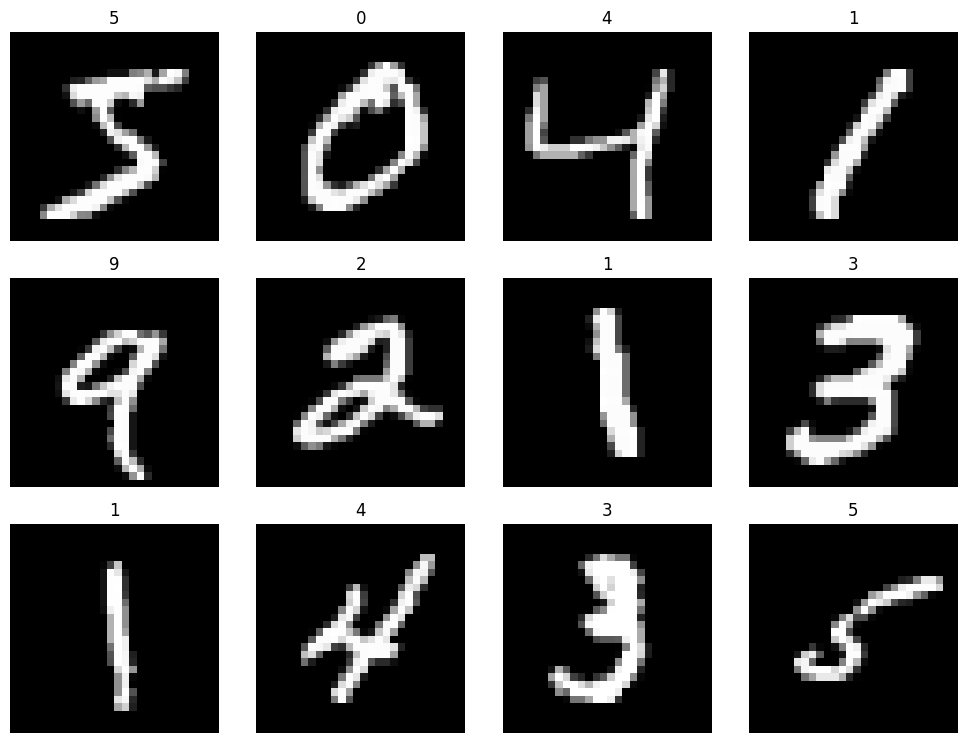

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("shape of the image before reshaping it: ", x_train[0].shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print("shape of the image after reshaping it", x_train[0].shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

shape of the image before reshaping it:  (28, 28)
shape of the image after reshaping it (28, 28, 1)


In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Building the Model Architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.7829 - loss: 0.7313 - val_accuracy: 0.9670 - val_loss: 0.1053
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9662 - loss: 0.1110 - val_accuracy: 0.9793 - val_loss: 0.0678
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9759 - loss: 0.0742 - val_accuracy: 0.9806 - val_loss: 0.0602
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9820 - loss: 0.0594 - val_accuracy: 0.9823 - val_loss: 0.0547
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9848 - val_loss: 0.0470


In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


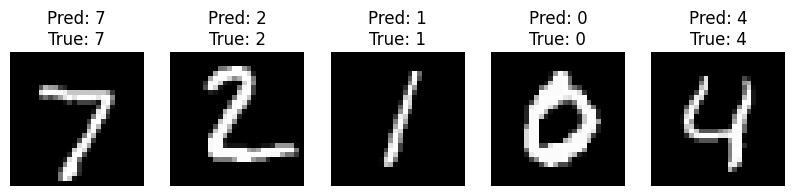

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')

In [ ]:
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
cvscores = []

for train_index, val_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(x_train_fold, y_train_fold,
              batch_size=128, epochs=2, verbose=1,
              validation_data=(x_val_fold, y_val_fold))

    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold score: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

print(f"Mean accuracy: {np.mean(cvscores)}% (+/- {np.std(cvscores)})")

Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9970 - val_loss: 0.0079
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9978 - val_loss: 0.0068
Fold score: 99.77666735649109%
Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9977 - val_loss: 0.0068
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9980 - loss: 0.0059 - val_accuracy: 0.9942 - val_loss: 0.0152
Fold score: 99.42333102226257%
Mean accuracy: 99.59999918937683% (+/- 0.1766681671142578)


In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


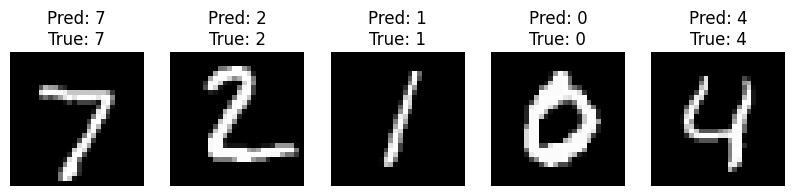

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')